How are Calories, Total Fat (g), and Cholesterol (mg) and which drink has the highest amount?

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
drink_menu = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [216]:
drink_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [217]:
drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [218]:
drink_menu.dropna(inplace=True)

In [219]:
drink_menu.columns = drink_menu.columns.str.strip()

In [220]:
drink_menu['Total Fat (g)'].iloc[236] = 3.2

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [221]:
drink_menu['Total Fat (g)'] = pd.to_numeric(drink_menu['Total Fat (g)'],errors='coerce')
drink_menu['Total Fat (g)']

0      0.1
1      0.1
2      0.1
3      0.1
4      0.1
      ... 
237    3.2
238    0.1
239    3.5
240    1.5
241    0.1
Name: Total Fat (g), Length: 241, dtype: float64

In [222]:
drink_menu['Vitamin A (% DV)'] = drink_menu['Vitamin A (% DV)'].str.replace('%','')
drink_menu['Vitamin A (% DV)'] = pd.to_numeric(drink_menu['Vitamin A (% DV)'])

In [223]:
drink_menu['Vitamin C (% DV)'] = drink_menu['Vitamin C (% DV)'].str.replace('%','')
drink_menu['Vitamin C (% DV)'] = pd.to_numeric(drink_menu['Vitamin C (% DV)'])

In [224]:
drink_menu['Calcium (% DV)'] = drink_menu['Calcium (% DV)'].str.replace('%','')
drink_menu['Calcium (% DV)'] = pd.to_numeric(drink_menu['Calcium (% DV)'])

In [225]:
drink_menu['Iron (% DV)'] = drink_menu['Iron (% DV)'].str.replace('%','')
drink_menu['Iron (% DV)'] = pd.to_numeric(drink_menu['Iron (% DV)'])

In [226]:
drink_menu['Caffeine (mg)'].value_counts()

75        37
0         35
150       34
70        14
varies    12
95        11
Varies    10
110        9
130        7
120        6
25         6
175        4
90         4
20         3
10         3
180        3
140        3
145        3
170        3
80         3
55         3
30         3
15         3
85         3
100        3
125        3
50         3
165        2
260        1
225        1
410        1
65         1
330        1
300        1
105        1
235        1
Name: Caffeine (mg), dtype: int64

In [227]:
cf_nums = pd.to_numeric(drink_menu['Caffeine (mg)'],errors='coerce')
cf_nums.dropna(inplace=True)
cf_mean = np.mean(cf_nums)
cf_median = np.median(cf_nums)
print(cf_mean,cf_median)

89.52054794520548 75.0


In [228]:
cf_mean=90
drink_menu['Caffeine (mg)'][drink_menu['Caffeine (mg)'] == 'varies'] = cf_mean
drink_menu['Caffeine (mg)'][drink_menu['Caffeine (mg)'] == 'Varies'] = cf_mean

<ipython-input-228-92f6ec1946ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drink_menu['Caffeine (mg)'][drink_menu['Caffeine (mg)'] == 'varies'] = cf_mean
<ipython-input-228-92f6ec1946ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drink_menu['Caffeine (mg)'][drink_menu['Caffeine (mg)'] == 'Varies'] = cf_mean


In [229]:
drink_menu['Caffeine (mg)'].value_counts()

75     37
0      35
150    34
90     22
70     14
95     11
110     9
130     7
120     6
25      6
175     4
90      4
180     3
140     3
20      3
170     3
145     3
10      3
80      3
55      3
30      3
15      3
85      3
100     3
125     3
50      3
165     2
260     1
225     1
410     1
65      1
235     1
300     1
105     1
330     1
Name: Caffeine (mg), dtype: int64

In [230]:
drink_menu['Caffeine (mg)'] = pd.to_numeric(drink_menu['Caffeine (mg)'])

In [231]:
drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        241 non-null    object 
 1   Beverage                 241 non-null    object 
 2   Beverage_prep            241 non-null    object 
 3   Calories                 241 non-null    int64  
 4   Total Fat (g)            241 non-null    float64
 5   Trans Fat (g)            241 non-null    float64
 6   Saturated Fat (g)        241 non-null    float64
 7   Sodium (mg)              241 non-null    int64  
 8   Total Carbohydrates (g)  241 non-null    int64  
 9   Cholesterol (mg)         241 non-null    int64  
 10  Dietary Fibre (g)        241 non-null    int64  
 11  Sugars (g)               241 non-null    int64  
 12  Protein (g)              241 non-null    float64
 13  Vitamin A (% DV)         241 non-null    int64  
 14  Vitamin C (% DV)         2

In [8]:
nutrition_drinks = pd.read_csv('starbucks-menu-nutrition-drinks.csv')

In [14]:
nutrition_drinks.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [10]:
nutrition_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


<ipython-input-241-0c2f753fce74>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  drink_menu.hist(ax=ax)


Y-axis represents  the number of drinks and X-axis represents the nutrition info


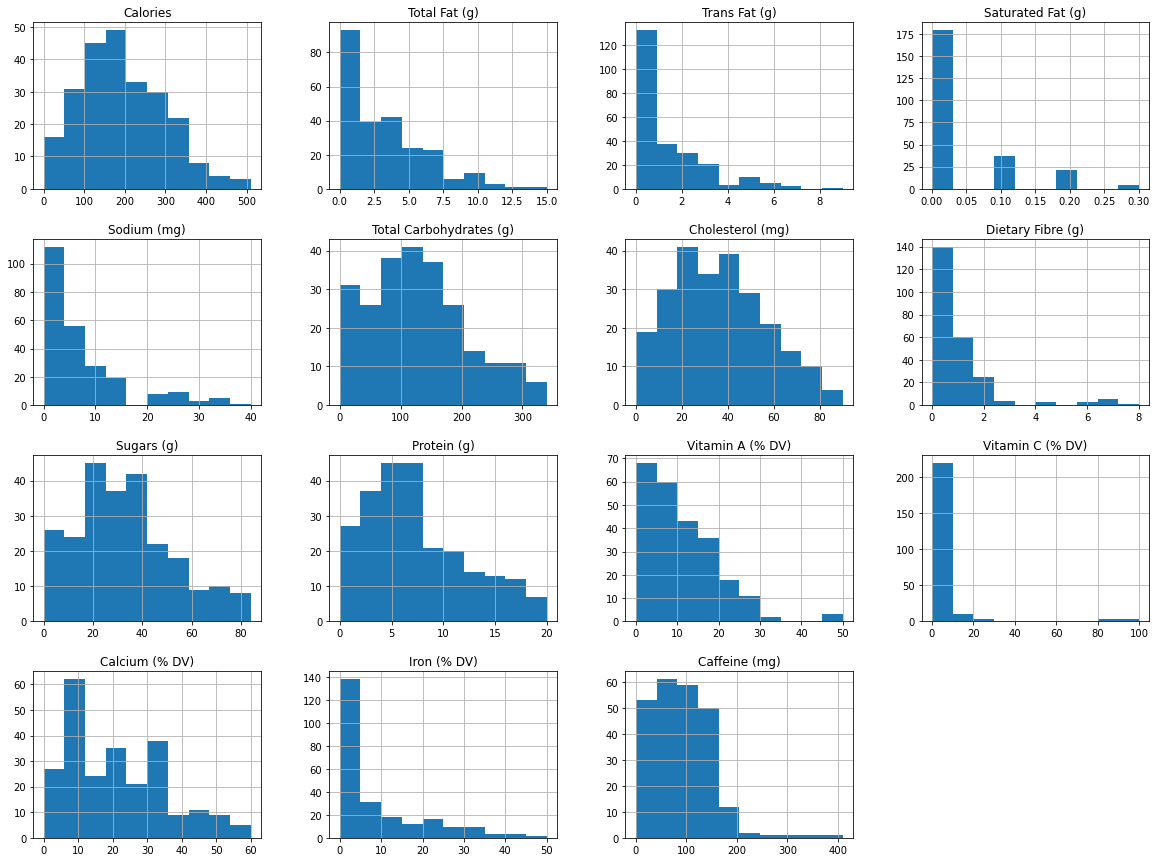

In [241]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
drink_menu.hist(ax=ax)
plt.xlabel('Nutrition info')
plt.ylabel('Number of drinks')
print('Y-axis represents  the number of drinks and X-axis represents the nutrition info')

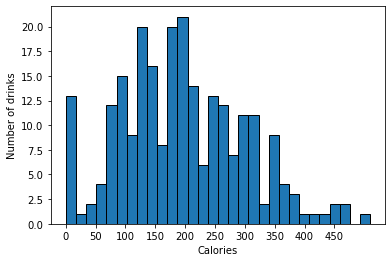

In [311]:
plt.hist(drink_menu['Calories'],bins=30,ec='black')
plt.xlabel('Calories')
plt.ylabel('Number of drinks')
plt.xticks(np.arange(0,500,step=50))
plt.show()

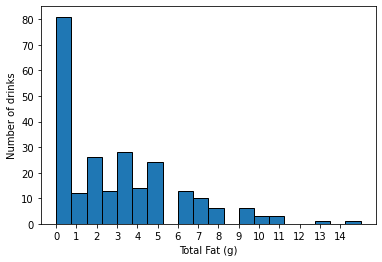

In [318]:
plt.hist(drink_menu['Total Fat (g)'],bins=20,ec='black')
plt.xlabel('Total Fat (g)')
plt.ylabel('Number of drinks')
plt.xticks(np.arange(0,15))
plt.show()

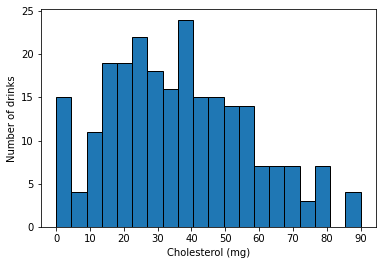

In [319]:
plt.hist(drink_menu['Cholesterol (mg)'],bins=20,ec='black')
plt.xlabel('Cholesterol (mg)')
plt.ylabel('Number of drinks')
plt.xticks(np.arange(0,100,step=10))
plt.show()

In [326]:
drink_menu[['Beverage','Beverage_prep','Calories','Total Fat (g)','Cholesterol (mg)']].sort_values(by=['Calories','Cholesterol (mg)','Total Fat (g)'],ascending=False)

,Beverage,Beverage_prep,Calories,Total Fat (g),Cholesterol (mg)
84,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,77
215,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,90
85,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,70
83,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7.0,78
128,Tazo® Green Tea Latte,2% Milk,450,10.0,72
...,...,...,...,...,...
0,Brewed Coffee,Short,3,0.1,0
102,Tazo® Tea,Short,0,0.0,0
103,Tazo® Tea,Tall,0,0.0,0
104,Tazo® Tea,Grande,0,0.0,0


In [327]:
drink_menu[['Beverage','Beverage_prep','Calories','Total Fat (g)','Cholesterol (mg)']].sort_values(by=['Cholesterol (mg)','Calories','Total Fat (g)'],ascending=False)

,Beverage,Beverage_prep,Calories,Total Fat (g),Cholesterol (mg)
215,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,90
214,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,90
101,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,89
216,Java Chip (Without Whipped Cream),Soymilk,430,8.0,88
197,Mocha (Without Whipped Cream),Whole Milk,390,6.0,80
...,...,...,...,...,...
0,Brewed Coffee,Short,3,0.1,0
102,Tazo® Tea,Short,0,0.0,0
103,Tazo® Tea,Tall,0,0.0,0
104,Tazo® Tea,Grande,0,0.0,0


In [347]:
order_chol = drink_menu['Cholesterol (mg)'].sort_values().reset_index().drop(columns='index')
order_chol[order_chol == 77].dropna()
230/241

0.9543568464730291

In [ ]:
attributes = ['Calories','Total Fat (g)','Cholesterol (mg)']

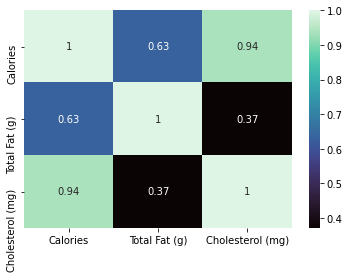

In [277]:
sns.heatmap(drink_menu[attributes].corr(),annot=True,cmap='mako')

We see that there is a strong correlation between Calories and Cholesterol.
With the White Chocolate Mocha leading the chart in highest calories and in the 95th percintile of cholesterol 